In [1]:
%load_ext autoreload
%autoreload 2
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)
%xmode Plain
import pandas as pd
import numpy as np
import numpy.random as npr
import utils as helper
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Exception reporting mode: Plain


# Q1
Link to the [pdf](https://drive.google.com/file/d/1YhLUJuHG-geJgn1pXUl7KHdrrjGvUgQr/view?usp=sharing)

---

# Q2
a) Solution by sk-learn

In [9]:
X = [[1, 2],
     [2, 4],
     [3, 6],
     [4, 8]]
y = [2,3,4,5]
X = np.array(X)
y = np.array(y)
# Setting up data

In [10]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.predict([[2,4.4]])

array([3.16])

---
# Q2
b) Using normal Equations.

We get ``LinAlgError`` because the matrix $X.X^{T}$ is singular, therefore inverting such a matrix would fail.

In [12]:
from lregress import normalEquationRegression
# theta = normalEquationRegression(X, y)
# theta

Sk-learn overcomes this problem by using a different technique to calculate inverses, called [Moore–Penrose pseudo inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse).

---
# Q3
a) Running Sk-learn on real-estate price prediction problem.

In [101]:
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
10,2013.083333,34.8,405.21340,1,24.97349,121.53372
68,2013.416667,30.4,464.22300,6,24.97964,121.53805
291,2012.833333,3.4,56.47425,7,24.95744,121.53711
212,2013.333333,17.6,1805.66500,2,24.98672,121.52091
181,2013.166667,11.6,201.89390,8,24.98489,121.54121


In [14]:
def rmse(pred, true):
    return np.sqrt(np.mean((pred-true)**2))

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("The RMSE error obtained is: ", rmse(y_pred, y_test.values))

The RMSE error obtained is:  10.699084128276917


In [16]:
print(lr.coef_)
print(lr.intercept_)

[ 3.97653110e+00 -2.67565866e-01 -3.92319362e-03  1.20282917e+00
  2.21118908e+02  2.94468148e+01]
-17063.322865229766


---
# Q3
b) To assume that the co-efficients learnt signify the importance of the feature is wrong. This can be shown by thinking of a example where on of the feature measures some quantities in ``centimeters`` and the same feature is converted to ``inches`` in the next curve fitting. Since we already know the importance of the feature would not change by the unit it is measured in but the co-efficients would get changed. Here by taking a feature in a different unit, the importance of the feature can be decreased (stated in the question) is a contradiction as clearly importance of a feature is not dependent on the unit it is measured. There for the coefficients don't tell us anything about the importance of the features.

In [17]:
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([ 3.97653110e+00, -2.67565866e-01, -3.92319362e-03,  1.20282917e+00,
        2.21118908e+02,  2.94468148e+01])

---
# Q3
c) Scaling the numerical columns of the Data Frame.

In [109]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(3)

D:\Users\apoor\Miniconda3\envs\3d\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
41,0.909091,0.383562,0.625434,0.0,0.132089,0.322299
143,0.909091,0.310502,0.072525,0.5,0.400873,0.688376
280,0.636364,0.052511,0.024897,0.6,0.408871,0.726008


In [19]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([  5.09244595, -11.79622823, -31.87607036,  11.84483643,
        16.33263154,  -3.11272364])

---
# Q3
c)
Coefficients learnt on the normalized data still don't ######### 

---
# Q3
d) Distribution of the residuals.

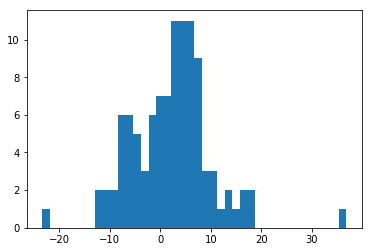

In [20]:
plt.hist(y_pred-y_test, bins=40);

The distribution is mostly centered at 0 with a look of a gaussian (Not sure if it should be, mathematically). We see a noisy sample in our data though, the point that has a error of nearly -75.

One thing that I feel is that if we remove the outlier, the data would be much better fitted. I am able to guess this as we know that our error function is Root Mean Squared, which takes the square of the error, and a larger error would have a much larger affect on our qudratic error function.

# Q3
e) 5 Cross-Validation for hyperparameter selection 

In [21]:
def nested_cross(dTrain, depths, num_valid):
    n, m = dTrain.shape
    m = m - 1 # one of the axis is predictions.
    
    dTrain.iloc[]
    folds = make_folds(dTrain_n, num_valid)
    # holding out test
    passed_folds = folds[:-1]
    k = best_k(passed_folds, depths)
    acc = 0
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_test = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        mydt = LinearRegression()
        mydt.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
        my_preds = np.squeeze(mydt.predict(curr_fold_test.iloc[:, :-1]).values)
        true = curr_fold_test.iloc[:, -1].values
        my_acc = ((true == my_preds).sum())/curr_fold_test.shape[0]
        acc += my_acc/num_valid
    return {"depth": k, "acc": acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths):
    '''return depth that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            mydt = LinearRegression()
            mydt.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
            my_preds = mydt.predict(curr_fold_validation.iloc[:, :-1])
            true = curr_fold_validation.iloc[:, -1]
            true = true.values
            my_preds = np.squeeze(my_preds.values)
            assert (true.shape == my_preds.shape)
            my_acc = ((true == my_preds).sum())/curr_fold_validation.shape[0]
            if k in acc.keys():
                acc[k] += my_acc
            else:
                acc[k] = my_acc
    acc = {k: acc[k]/num_valid for k in acc.keys()}
    
    x = acc
    print (acc) # for showcasing
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted(x[0] for x in sorted_by_value if sorted_by_value[-1][1] == x[1])[0]

In [ ]:
from sklearn.utils import shuffle
from utils import make_folds

def NestedCross:
    def __init__(self,
                 clf,
                 folds=4,
                 method='fwd_selection'):
        self.clf = clf
        self.folds = folds
        self.method = method
    
    def train(self, X, y):
        self.data = X, y
        folder = Folders(X, y,
                         self.folds,
                         method=self.method)
        X_train, y_train, X_val, y_val = folder.find_next_folds(last_err=None)
        _select_folds()
        

class Folders:
    def __init__(self,
                 X,
                 y,
                 folds,
                 method='fwd_selection'):
        self.data = X, y
        self.folds = folds
        self.method = method

    def find_next_folds(self, lst_err):
        self._make_folds(self.folds)
        
    
    def _find_imp(self):
        
    
    def _select_cols(self):
        imp = self._find_imp()
    
    def _make_folds(self, folds):
        '''Make a number of folds with diven pd'''
        train = shuffle(dTrain)
        last = train.shape[0]
        folds_list = []
        for i in range(folds):
            start = i*int(last/folds)
            end = (i+1)*int(last/folds)
            if end >= last:
                end = -1
            folds_list.append(train.iloc[start:end, :])
        return folds_list

    
def make_folds(dTrain, folds):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(folds):
        start = i*int(last/folds)
        end = (i+1)*int(last/folds)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds



---
# Q4
[Link](https://gist.github.com/k0pch4/4ae7c4929558cfa2c54c9517466b03e6#file-lregress-py) to all the functions below.

a) ``normalEquationRegression(X, y)`` takes in ``X`` and ``y`` and returns a vector ``Theta=[theta0, ..., thetad]`` of dimention 1 more than the number of features in ``X``.

b) ``gradientDescentRegression(X, y, alpha=0.001, it=1000)`` uses iterative gradient descent to find the optimal ``Theta``. Returns, a vector ``Theta=[theta0, ..., thetad]``.



c) ``gradientDescentAutogradRegression(X, y, alpha=0.001, it=1000)`` uses `Autograd` library to directly calculate the gradients, therefore we are not requried to calculate them by hand. Returns ``Theta``.

d) ``gradientDescentPytorchRegression(X, y, alpha=0.001, it=1000)`` uses `Autograd` internally to directly calculate the gradients, therefore we are not requried to calculate them by hand. Returns ``Theta``.

e) Below are the differnt demos for all of the implementations.

In [124]:
from lregress import normalEquationRegression
from lregress import gradientDescentRegression
from lregress import gradientDescentAutogradRegression
from lregress import gradientDescentPytorchRegression

In [125]:
th = normalEquationRegression(X_train, y_train)
print ("normalEquationRegression theta:\n", th)

th = gradientDescentRegression(X_train, y_train)
print ("gradientDescentRegression theta:\n", th)

th = gradientDescentAutogradRegression(X_train, y_train)
print ("gradientDescentAutogradRegression theta:\n", th)

th = gradientDescentPytorchRegression(X_train, y_train)
print ("gradientDescentPytorchRegression theta:\n", th)

normalEquationRegression theta:
 [ 29.71075446   4.90713221 -12.11290184 -25.3046629   11.57049822
  18.99363026   2.18916535]
gradientDescentRegression theta:
 [ 27.41372088   4.8840888  -12.135721   -22.89261403  11.77306556
  19.93960562   4.38329791]
gradientDescentAutogradRegression theta:
 [ 27.41372088   4.8840888  -12.135721   -22.89261403  11.77306556
  19.93960562   4.38329791]
gradientDescentPytorchRegression theta:
 [ 27.39249     4.8838696 -12.135942  -22.870312   11.774922   19.948547
   4.4034576]


### ---
# Q5

In [67]:
# Generating some data
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + \
    8*x**2 -300*x - 1e5 + \
    np.random.randn(len(x))*1e5


In [97]:
transformed(x, y)

array([nan, nan, nan, nan, nan, nan])

In [96]:
def transformed(x, y, p = 5):
    X = []
    for i in range(1, p+1):
        X.append(np.power(x, i))
    X = np.array(X).T
    return gradientDescentAutogradRegression(X, y, alpha=0.00001, it=10000)

---
# Q6

In [120]:
# building a toy problem
X = [1, 3, 6]
Y = [6, 10, 16]
X = np.array(X)
Y = np.array(Y)

In [121]:
import matplotlib.pyplot as plt
def plot():
    delta = 0.2
    th_0 = np.arange(-4.0, 4.0, delta)
    th_1 = np.arange(-4.0, 4.0, delta)
    Th_0, Th_1 = np.meshgrid(th_0, th_1)
    Z = cost(Th_0, Th_1)
    print (Z.shape)
    plt.contour(Z, Th_0, Th_1)
    
def cost(th0, th1):
    msh = []
    for i in range(th1.shape[0]):
        temp2 = 0
        for j in range(X.shape[0]):
            temp = th1[0, i] * X[j] + th0[0, i]
            temp = (temp-y[j])**2
            temp2 += temp
        msh.append(temp2)
    mesh = np.array(msh)
    mesh, _ = np.meshgrid(mesh, np.arange(th1.shape[0]))
    return mesh

(40, 40)


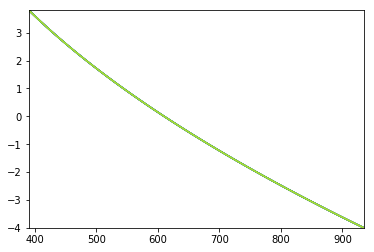

In [122]:
plot()

In [3]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.2
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

ValueError: Unable to coerce to DataFrame, shape must be (310, 6): given (20, 30)

b) Using normal Equations
link to [pdf](https://drive.google.com/file/d/1xoMWRFT8beyL0IEr9pltqCyD1svStdA8/view?usp=sharing)

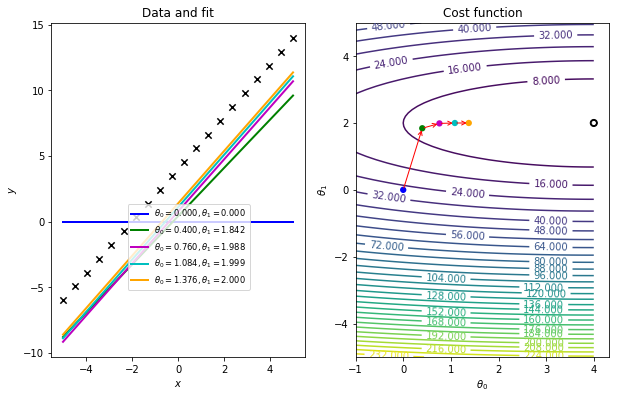

In [21]:
# The data to fit
m = 20
theta0_true = 4
theta1_true = 2
x = np.linspace(-5,5,m)
y = theta0_true + theta1_true * x

# # The plot: LHS is the data, RHS will be the cost function.
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
# ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.1
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
    va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
    label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
fontsize='small')

plt.show()